In [1]:
%matplotlib inline

In [3]:
import os,fnmatch
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras import optimizers
from keras import backend as K
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import np_utils

np.random.seed(2) 

sns.set(style='white', context='notebook', palette='deep')

In [3]:
from imutils import paths

relevant_path = "data/train/"
imagePaths = list(paths.list_images(relevant_path))
for imagePath in imagePaths:
   label = imagePath.split(os.path.sep)[-2]
   print(imagePath)
   print(label)

data/train/0\barcode_nue100.jpg
data/train/0
data/train/0\barcode_nue102.jpg
data/train/0
data/train/0\barcode_nue103.jpg
data/train/0
data/train/0\barcode_nue104.jpg
data/train/0
data/train/0\barcode_nue105.jpg
data/train/0
data/train/0\barcode_nue106.jpg
data/train/0
data/train/0\barcode_nue107.jpg
data/train/0
data/train/0\barcode_nue108.jpg
data/train/0
data/train/0\barcode_nue110.jpg
data/train/0
data/train/0\barcode_nue111.jpg
data/train/0
data/train/0\barcode_nue112.jpg
data/train/0
data/train/0\barcode_nue113.jpg
data/train/0
data/train/0\barcode_nue114.jpg
data/train/0
data/train/0\barcode_nue115.jpg
data/train/0
data/train/0\barcode_nue116.jpg
data/train/0
data/train/0\barcode_nue117.jpg
data/train/0
data/train/0\barcode_nue118.jpg
data/train/0
data/train/0\barcode_nue119.jpg
data/train/0
data/train/0\barcode_nue120.jpg
data/train/0
data/train/0\barcode_nue121.jpg
data/train/0
data/train/0\barcode_nue123.jpg
data/train/0
data/train/0\barcode_nue124.jpg
data/train/0
data/train

In [4]:
import random
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Leer archivos para preprocesar 
relevant_path = "data/train/"
pattern = "*.jpg"  
img_width=224
img_height=224

nb_classes = 2

img_channels = 1

print('Formato imagenes: ', K.image_data_format())
# Formato imagenes:  channels_last
 
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []

# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(relevant_path)))
random.seed(42)
random.shuffle(imagePaths)

# load the image, pre-process it, and store it in the data list
for imagePath in imagePaths:
    #fpaths.append(relevant_path + w)
    #if w not in images:
    #    if fnmatch.fnmatch(imagePath, pattern):
    image = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE) 
    image = cv2.resize(image, (img_width, img_height), img_channels)
    image = img_to_array(image)
    data.append(image)
        
    # extract the class label from the image path and update the
    # labels list
    label = imagePath.split(os.path.sep)[-2]
    label = 1 if (label.endswith("1")) else 0
    labels.append(label)
    
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)        
        
print('Cantidad imagenes: ', len(data))  
print('x_train shape:', data.shape)
print(data.shape[0], 'train samples')

Formato imagenes:  channels_last
[INFO] loading images...
Cantidad imagenes:  248
x_train shape: (248, 224, 224, 1)
248 train samples


In [5]:
from keras import utils
from sklearn.model_selection import train_test_split

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, num_classes)
y_test= utils.to_categorical(y_test, num_classes)

print(x_train.shape[0], 'train samples')
print('x_train shape:', x_train.shape)
print(x_test.shape[0], 'test samples')
print('x_test shape:', x_test.shape)

186 train samples
x_train shape: (186, 224, 224, 1)
62 test samples
x_test shape: (62, 224, 224, 1)


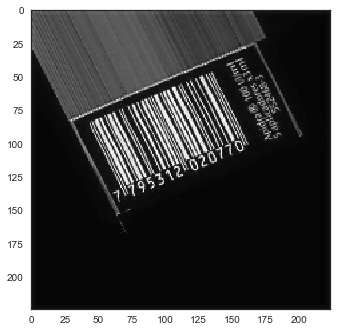

In [6]:
g = plt.imshow(x_train[0][:,:,0])

In [7]:
## DEFINE MODEL CNN 

In [1]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import GlobalAveragePooling2D, BatchNormalization
from keras.layers.core import Activation, Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras import backend as K

class ModelImage:
    @staticmethod
    def build_cnn1(width, height, depth, classes):
        # initialize the model
        model_cnn1 = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (height, width, depth)
            
        model_cnn1 = Sequential()
        model_cnn1.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=inputShape))
        model_cnn1.add(Activation('relu'))
        model_cnn1.add(Dropout(0.25))

        model_cnn1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
        model_cnn1.add(Activation('relu'))
            
        model_cnn1.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
        model_cnn1.add(Activation('relu'))
        model_cnn1.add(Dropout(0.25))
        
        #model_cnn1.add(Flatten(input_shape=inputShape))
        model_cnn1.add(GlobalAveragePooling2D())
        model_cnn1.add(Dense(5, activation='relu'))
        model_cnn1.add(Dropout(0.5))
        model_cnn1.add(Dense(classes, activation='sigmoid'))

        return model_cnn1
    
    def build_cnn2(width, height, depth, classes):
        # initialize the model 
        model_cnn2 = Sequential()
        inputShape = (height, width, depth)

        # if we are using "channels first", update the input shape
        if K.image_data_format() == "channels_first":
            inputShape = (depth, height, width)

        model_cnn2.add(Flatten(input_shape=inputShape))
        model_cnn2.add(Dense(256, activation='relu'))
        model_cnn2.add(Dropout(0.5))
        model_cnn2.add(Dense(classes, activation='sigmoid'))
    
        return model_cnn2    

Using TensorFlow backend.


In [123]:
## CASO 1 SIN AUMENTACION 
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
print("[INFO] compiling model...")
model_cnn1 = ModelImage.build_cnn2(width=img_width, height=img_height, depth=img_channels, classes=num_classes) 
model_cnn1.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

print(model_cnn1.summary())

[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               12845312  
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
Total params: 12,845,826
Trainable params: 12,845,826
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

In [89]:
epochs = 30 
batch_size = 36

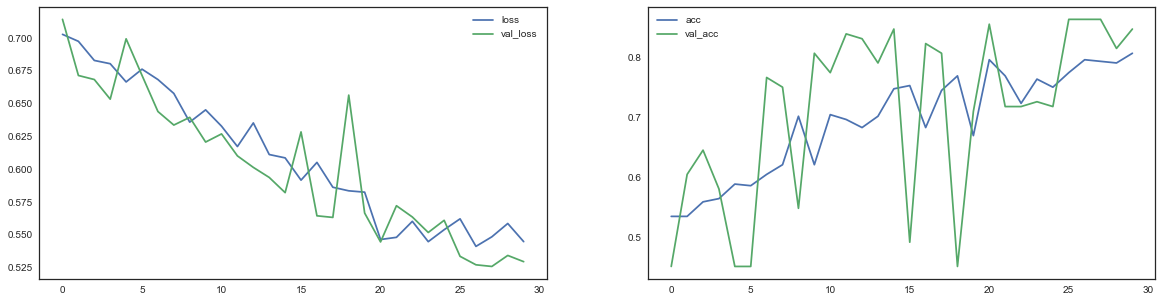

186/186 [==============================] - 1s - loss: 0.5446 - acc: 0.8065 - val_loss: 0.5294 - val_acc: 0.8468


In [90]:
# Without data augmentation 
checkpointer1 = ModelCheckpoint(filepath='model_cnn1_sin_aug.hdf5', verbose=1, save_best_only=True)
plot_losses1 = PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

model_cnn1.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_test, y_test), verbose = 1, callbacks=[learning_rate_reduction, checkpointer1, plot_losses1]) 

In [92]:
## CASO 2 
# With data augmentation to prevent overfitting 
datagen = ImageDataGenerator(rescale = 1./255)

datagen = ImageDataGenerator(
             featurewise_center=False, # set input mean to 0 over the dataset
             samplewise_center=False, # set each sample mean to 0
             featurewise_std_normalization=False, # divide inputs by std of the dataset
             samplewise_std_normalization=False, # divide each input by its std
             zca_whitening=False, # apply ZCA whitening
             rotation_range=10, # randomly rotate images in the range (degrees, 0 to 180)
             zoom_range = 0.1, # Randomly zoom image
             width_shift_range=0.1, # randomly shift images horizontally (fraction of total width)
             height_shift_range=0.1, # randomly shift images vertically (fraction of total height)
             horizontal_flip=False, # randomly flip images
             vertical_flip=False) # randomly flip images

datagen.fit(x_train)

C:\ProgramData\Anaconda3\lib\site-packages\keras\preprocessing\image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (186, 224, 224, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


In [93]:
# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
print("[INFO] compiling model...")

model_cnn2 = ModelImage.build_cnn2(width=img_width, height=img_height, depth=img_channels, classes=num_classes) 
model_cnn2.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

print(model_cnn2.summary())

[INFO] compiling model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               12845312  
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 514       
Total params: 12,845,826
Trainable params: 12,845,826
Non-trainable params: 0
_________________________________________________________________
None


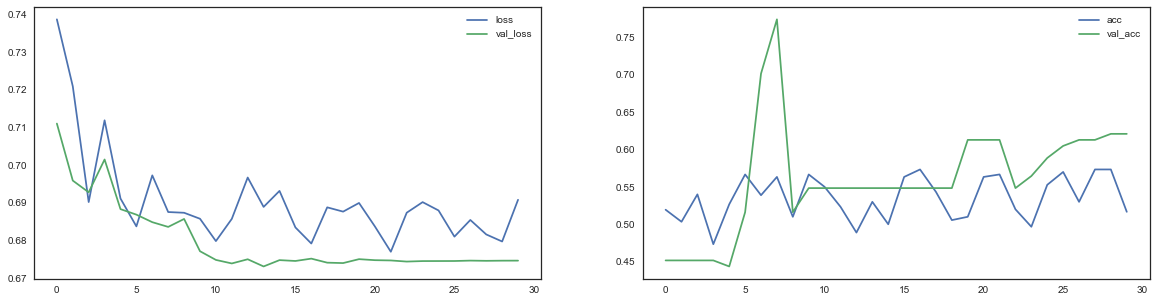

1s - loss: 0.7004 - acc: 0.4912 - val_loss: 0.6746 - val_acc: 0.6210


In [97]:
checkpointer2 = ModelCheckpoint(filepath='model_cnn1_con_aug.hdf5', verbose=1, save_best_only=True)
plot_losses2 =  PlotLosses(plot_interval=1, evaluate_interval=None, x_val=x_test, y_val_categorical=y_test)

# Fit the model                       
model_cnn2.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (x_test,y_test), verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[learning_rate_reduction, checkpointer2, plot_losses2]) 

MODELO 1 sin aumentacion


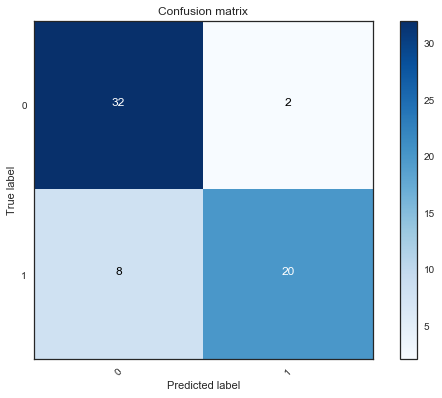

In [98]:
# Look at confusion matrix
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues, modelo=None):

    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
       cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
       plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
print("MODELO 1 sin aumentacion")  
modelo=model_cnn1   
# Predict the values from the validation dataset
Y_pred = modelo.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2), modelo=model_cnn1)


MODELO 2 con aumentacion 


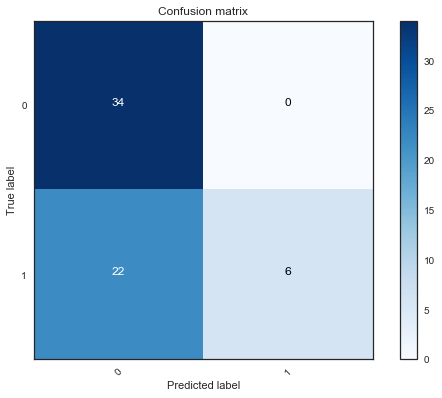

In [99]:
print("MODELO 2 con aumentacion ") 
modelo=model_cnn2 
# Predict the values from the validation dataset
Y_pred = modelo.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(2), modelo=model_cnn2)

In [105]:
# Modelo 1 sin aumentacion 
# Cargo los valores del modelo
model_cnn2.load_weights('model_cnn1_sin_aug.hdf5')
score1 = model_cnn2.evaluate(x_test, y_test, verbose=0)
print("loss: ", score1[0])
print("accuracy: ", score1[1])

loss:  0.52572010794
accuracy:  0.862903229652


In [83]:
# Modelo 1 con aumentacion 
model_cnn2.load_weights('model_cnn1_con_aug.hdf5')
score2 = model_cnn2.evaluate(x_test, y_test, verbose=0)
print("loss: ", score2[0])
print("accuracy: ", score2[1])

loss:  0.679388565402
accuracy:  0.443548390942
